Rows after filtering: 1338
Rows after filtering: 1329
Rows after filtering: 1191
  Variable          Mean     Median    Variance  Standard Deviation
0      Age  3.901092e+01  39.000000  197.588956           14.056634
1      BMI  1.789780e-16  -0.050020    1.000000            1.000000
2  Charges  8.919097e+00   9.029677    0.630410            0.793983


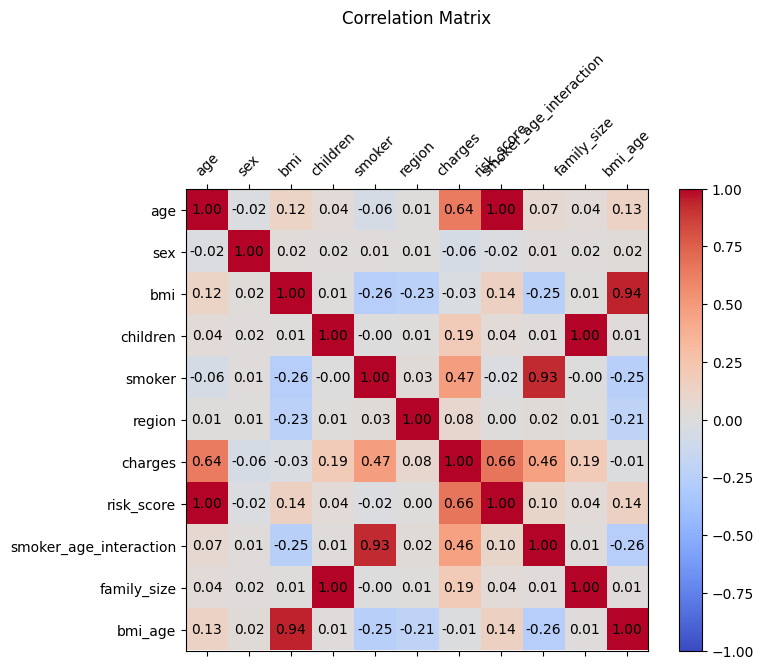

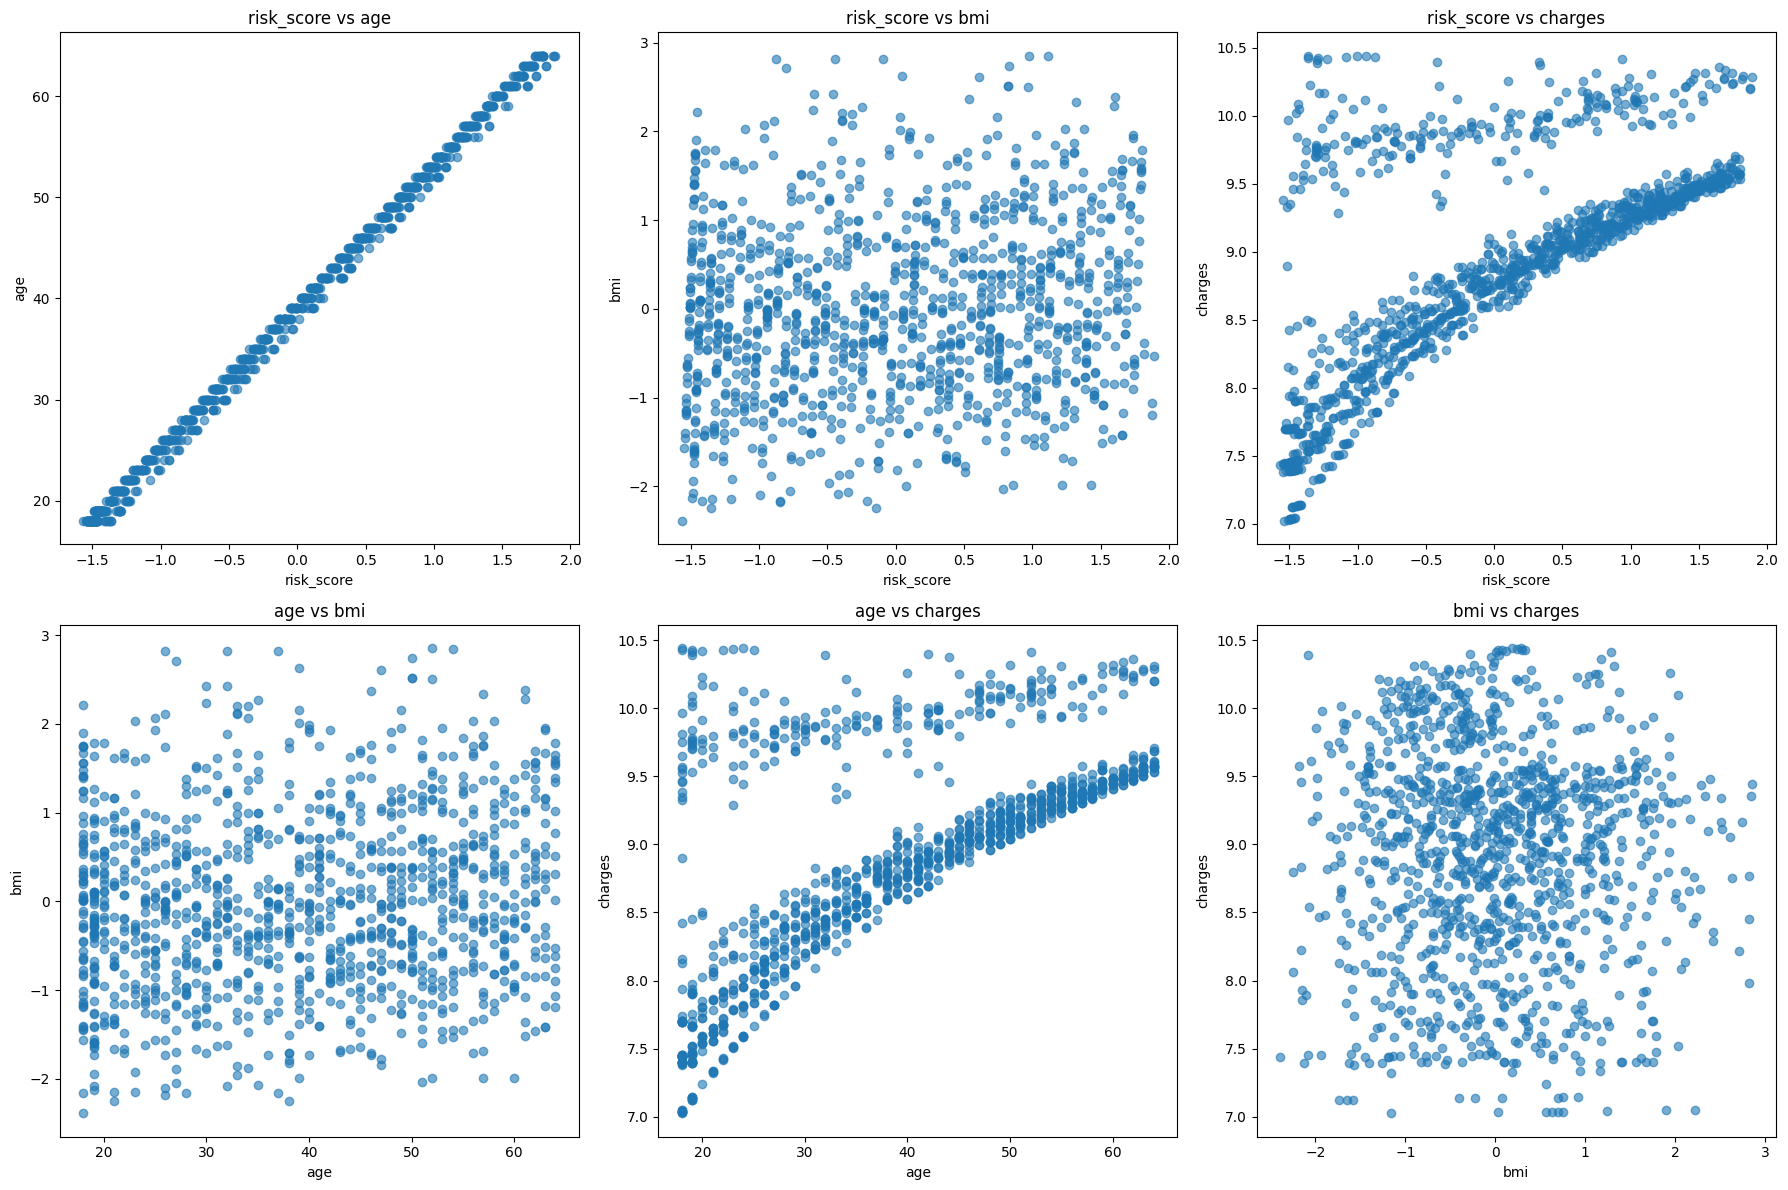

Converged after 678 iterations.
Converged after 1 iterations.
Coefficients achieved by Gradient Descent: [8.903148705912198, 0.5186895170819541, -0.08547786866612062]
Coefficients achieved by Newton's Method: [np.float64(8.912961312889863), np.float64(0.5197646698755113), np.float64(-0.08653688810626227)]


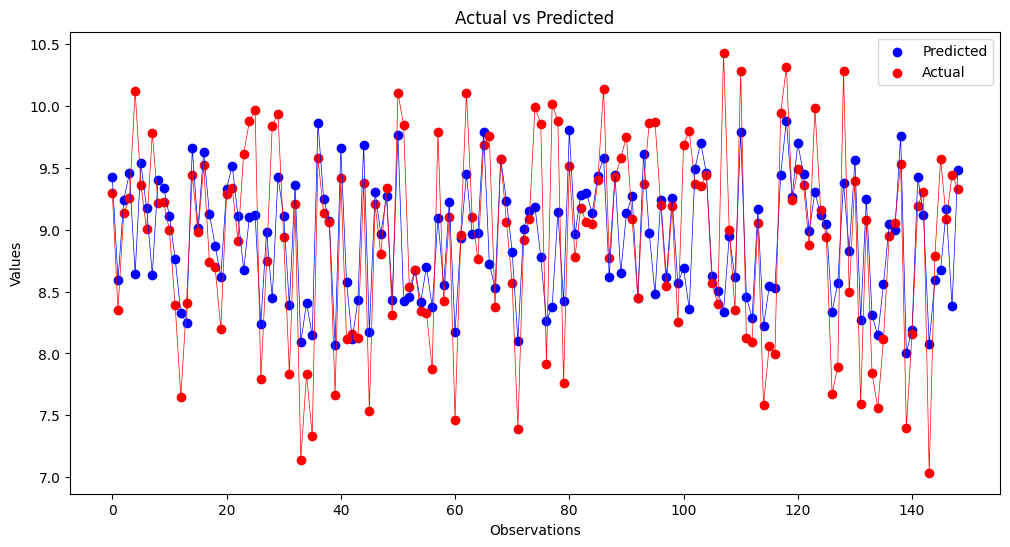

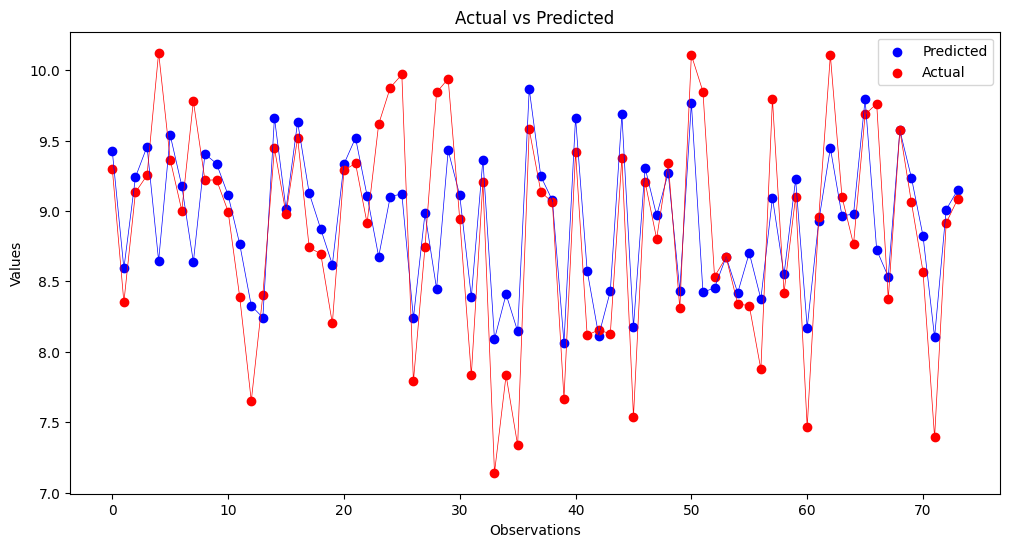

Mean Squared Error for Gradient Descent: 0.331259906695544
Coefficient of Determination for Gradient Descent: 0.4852501103943766


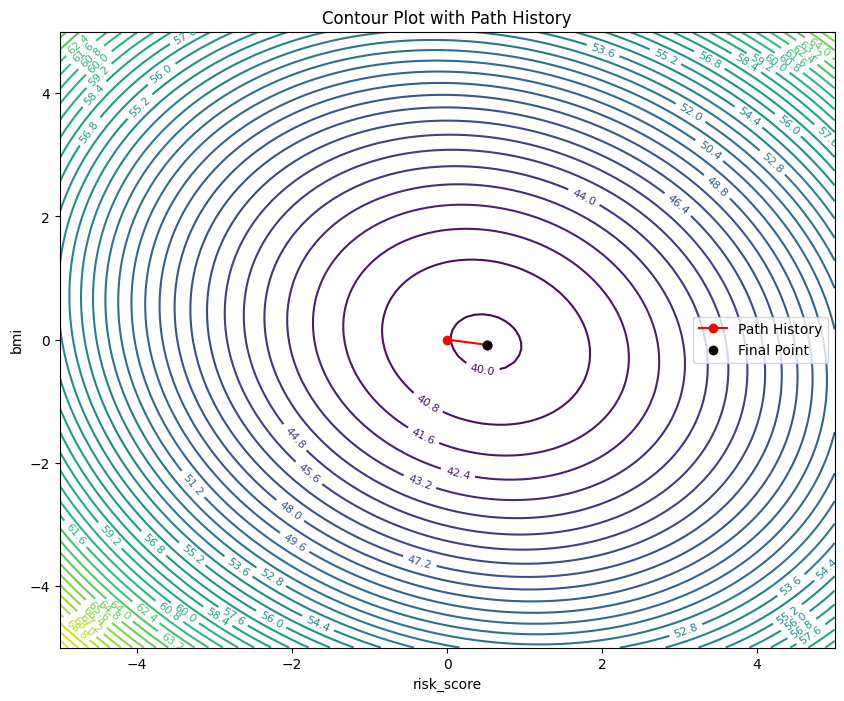

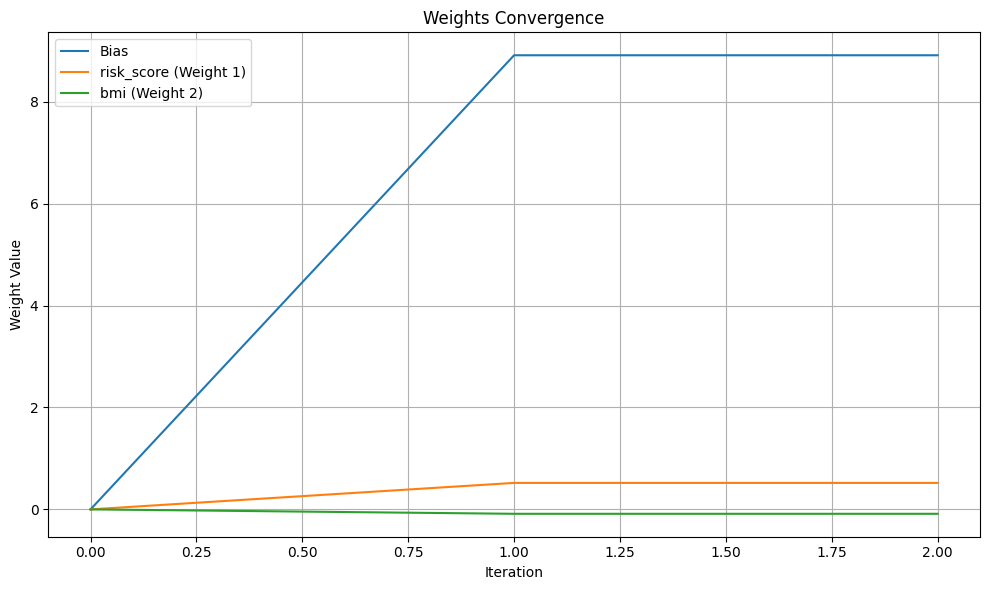

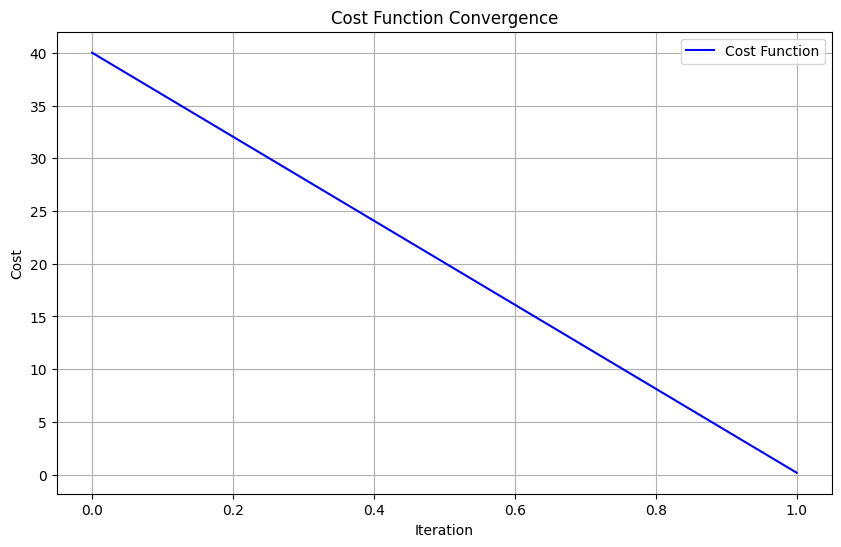

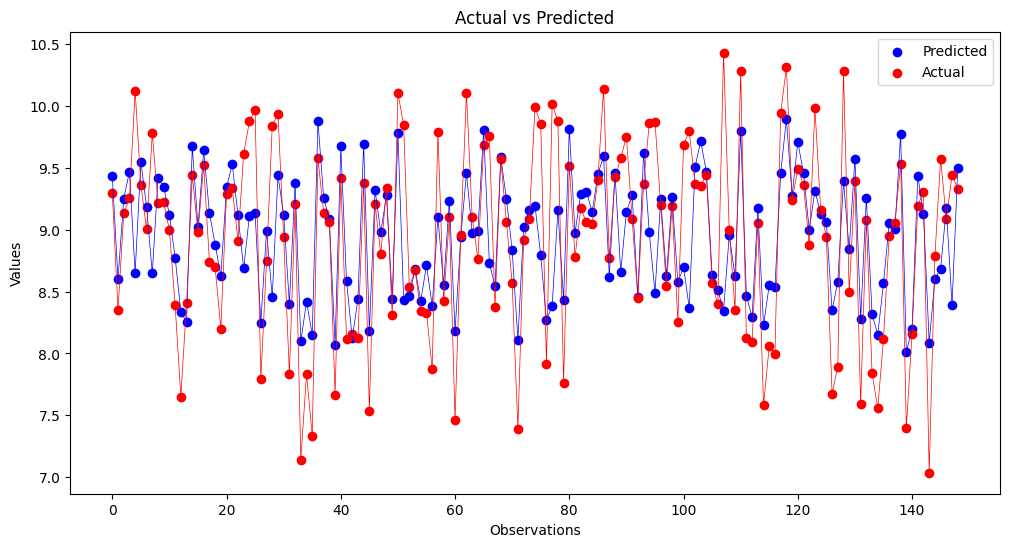

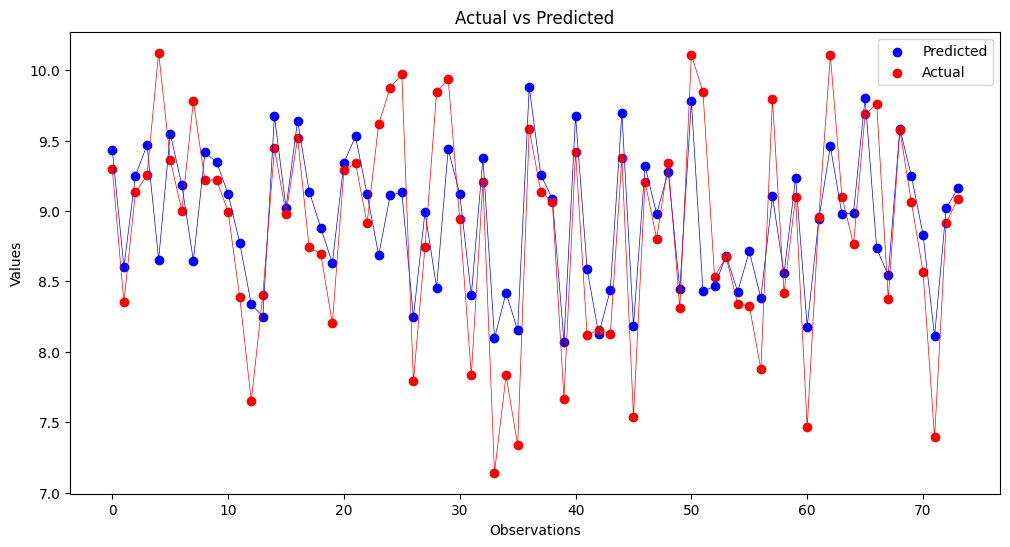

Mean Squared Error for Newton's Method: 0.33047736333587574
Coefficient of Determination for Newton's Method: 0.48587719614225133


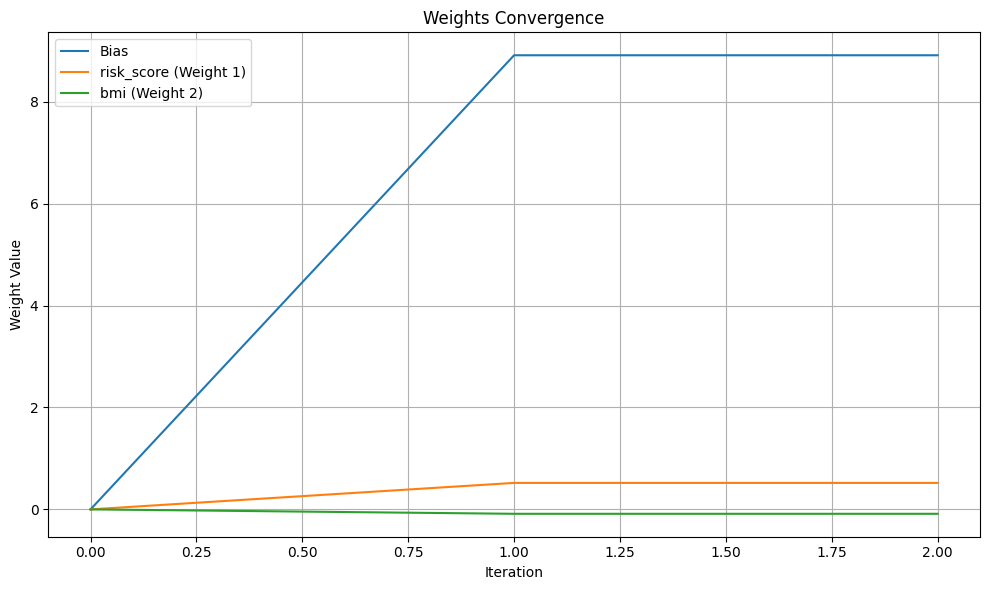

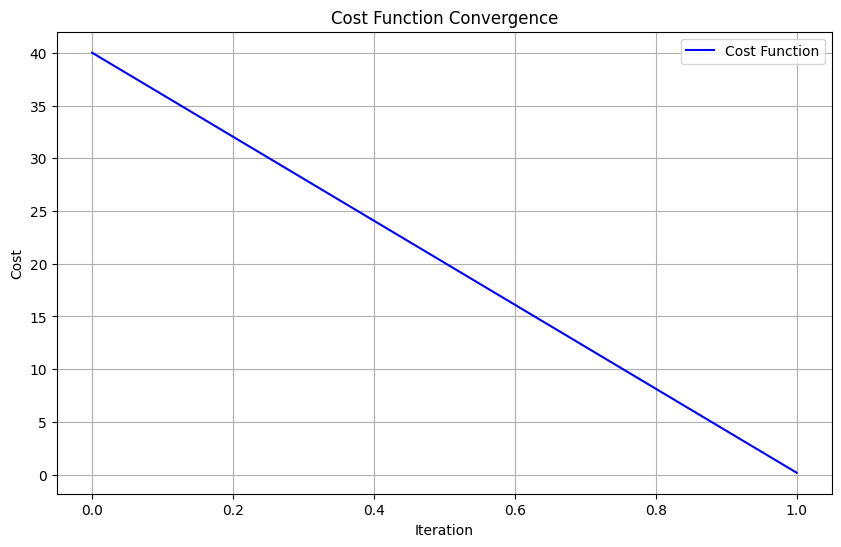

In [1]:

from StartPoint import StartPoint
import math

def main():
    data_path = 'E:\\NumericalMethods\\Project\\DataSet.csv'
    start_point = StartPoint(data_path)

    # Preprocess data
    X_train, X_test, y_train, y_test = start_point.preprocess_data()

    # Compute and display measures
    start_point.compute_and_display_measures()

    # Plot correlation matrix
    start_point.plot_correlation_matrix()

    # Plot scatter plots
    start_point.plot_scatter()

    # Train models
    start_point.train_model(X_train, y_train)

    # Print coefficients
    print("Coefficients achieved by Gradient Descent:", start_point.coefficients_gradient)
    print("Coefficients achieved by Newton's Method:", start_point.coefficients_newton)

    # Test Gradient Descent Model
    mse_gradient, r2_gradient = start_point.test_model(start_point.coefficients_gradient, X_test, y_test)
    start_point.display_results(mse_gradient, r2_gradient, "Gradient Descent")

    # Plotting for Gradient Descent
    start_point.plot_contour()
    start_point.plot_convergence()
    start_point.plot_cost_convergence()




    # Test Newton's Method Model
    mse_newton, r2_newton = start_point.test_model(start_point.coefficients_newton, X_test, y_test)
    start_point.display_results(mse_newton, r2_newton, "Newton's Method")

    # Plotting for Newton's Method
    start_point.plot_convergence()
    start_point.plot_cost_convergence()

    # Ask if the user wants to do predictions
    do_predict = input("Do you want to predict charges? (yes/no): ").lower()
    while do_predict not in ['yes', 'no']:
        do_predict = input("Invalid input. Do you want to predict charges? (yes/no): ").lower()

    if do_predict == 'yes':
        # Get user input
        age = float(input("Enter age: "))
        sex = input("Enter sex (male/female): ").lower()
        while sex not in ['male', 'female']:
            sex = input("Invalid input. Enter sex (male/female): ").lower()

        smoker = input("Are you a smoker? (yes/no): ").lower()
        while smoker not in ['yes', 'no']:
            smoker = input("Invalid input. Are you a smoker? (yes/no): ").lower()

        bmi = float(input("Enter BMI: "))
        children = int(input("Enter number of children (integer): "))
        
        region = input("Enter region (0: NorthWest, 1: SouthWest, 2: NorthEast, 3: SouthEast): ")
        while region not in ['0', '1', '2', '3']:
            region = input("Invalid input. Enter region (0: NorthWest, 1: SouthWest, 2: NorthEast, 3: SouthEast): ")
        region = int(region)

        # Encode user input
        sex_encoded = 1 if sex == 'male' else 0
        smoker_encoded = 1 if smoker == 'yes' else 0

        user_data = {
            'age': age,
            'sex': sex_encoded,
            'smoker': smoker_encoded,
            'bmi': bmi,
            'children': children,
            'region': region
        }

        # Process user input
        user_data = start_point.process_user_input(user_data)


        # Predict charges using both models
        charges_gradient = start_point.predict_charges(user_data, start_point.coefficients_gradient)
        charges_newton = start_point.predict_charges(user_data, start_point.coefficients_newton)

        print(f"Predicted charges using Gradient Descent: {math.pow(math.e,charges_gradient)}")
        print(f"Predicted charges using Newton's Method: {math.pow(math.e,charges_newton)}")

if __name__ == "__main__":
    main()